In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math
from google.colab import output
import cv2
import requests
pd.set_option('display.max_rows',None)


In [ ]:
symbols = [
           "BTC-USD",
           "ETH-USD",
           "XRP-USD",
           "BCH-USD",
           "ADA-USD",
           "LTC-USD",
           "XEM-USD",
           "XLM-USD",
           "EOS-USD",
           "NEO-USD",
           "MIOTA-USD",
           "DASH-USD",
           "XMR-USD",
           "TRX-USD",
           "XTZ-USD",
           "DOGE-USD",
           "ETC-USD",
           "VEN-USD",
           "USDT-USD",
           "BNB-USD"
]

with open("crypto_symbols.txt", "wb") as f:
    f.write(pickle.dumps(symbols))

In [ ]:
def get_dataframe(stock, anaysis_period = 3650*2):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

def update_stock_df():
    change_df = pd.DataFrame(columns = ["stock", "change"])
    REPORT_PERIOD = 1
    total_change = 0
    total_stock = 0

    labels = [i/10000 for i in range(500, -1, -25)]
    brightnesses = [i for i in range(255, 34, -11)]

    stock_df = {}
    color_list = []

    initialized = False
    i = 1

    for symbol in tqdm(symbols):
        start = time.time()

        try:
            df = get_dataframe(symbol)
            stock_df[symbol] = df

            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            idx = 0
            while abs(change) < labels[idx]:
                idx += 1
            brightness = brightnesses[idx]
            if change > 0:
                color = (0, brightness, 0)
            else:
                color = (brightness, 0, 0)

            color_list.append(color)
            color_matrix = []

            color_list = sorted(color_list)

            DIMENSION = int(len(color_list)**(1/2))

            for i in range(DIMENSION):
                color_matrix.append(color_list[i*DIMENSION:(i+1)*DIMENSION])


            if len(color_list) > DIMENSION * DIMENSION:
                a = color_list[DIMENSION * DIMENSION:]
                while len(a) > DIMENSION:
                    color_matrix.append(a[:DIMENSION])
                    a = a[DIMENSION:]
                while len(a) < DIMENSION:
                    a.append((255,255,255))

                color_matrix.append(a)

            plt.clf()
            plt.imshow(color_matrix)
            plt.savefig(f"{i}.png")
            plt.show()

            img = cv2.imread(f"{i}.png")
            height, width, layers = img.shape
            size = (width,height)

            if not initialized:
                out = cv2.VideoWriter(f"output.mp4",cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
                initialized = True


            i += 1
            out.write(img)

            change_df = change_df.append({"stock":symbol, "change":change}, ignore_index=True)
            total_change += change
            total_stock += 1
            print("average change:", round(total_change/total_stock,6)*100, "%")




        except Exception as e:
            print(e)

        while time.time() - start < 1:
            pass

    with open("/content/drive/MyDrive/Investment_Analysis/cripto_stock_df.txt", "wb") as f:
        f.write(pickle.dumps(stock_df))
    out.release()

    return change_df

  0%|          | 0/20 [00:00<?, ?it/s]

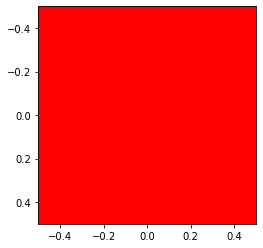

average change: nan %


  5%|▌         | 1/20 [00:01<00:19,  1.00s/it]

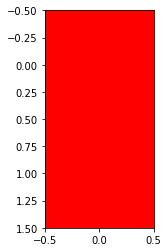

average change: nan %


 10%|█         | 2/20 [00:02<00:18,  1.01s/it]

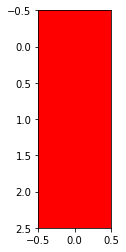

average change: nan %


 15%|█▌        | 3/20 [00:03<00:17,  1.01s/it]

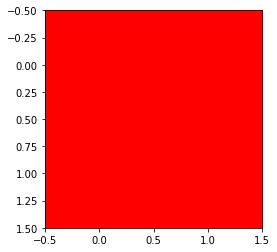

average change: nan %


 20%|██        | 4/20 [00:04<00:16,  1.01s/it]

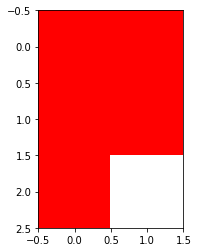

average change: nan %


 25%|██▌       | 5/20 [00:05<00:15,  1.00s/it]

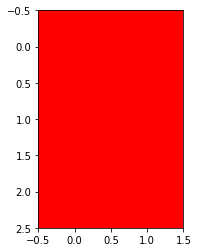

average change: nan %


 30%|███       | 6/20 [00:06<00:14,  1.00s/it]

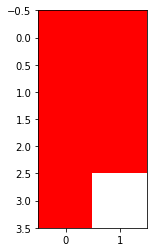

average change: nan %


 35%|███▌      | 7/20 [00:07<00:13,  1.00s/it]

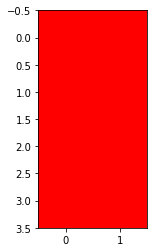

average change: nan %


 40%|████      | 8/20 [00:08<00:12,  1.00s/it]

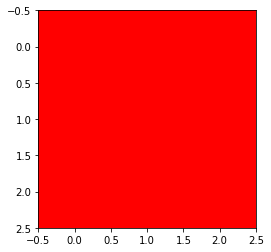

average change: nan %


 45%|████▌     | 9/20 [00:09<00:11,  1.00s/it]

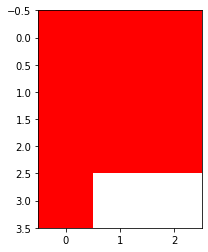

average change: nan %


 50%|█████     | 10/20 [00:10<00:10,  1.00s/it]

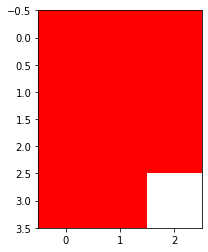

average change: nan %


 55%|█████▌    | 11/20 [00:11<00:09,  1.00s/it]

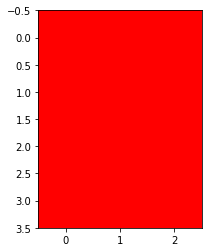

average change: nan %


 60%|██████    | 12/20 [00:12<00:08,  1.00s/it]

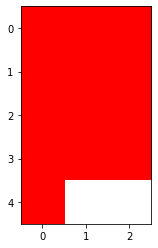

average change: nan %


 65%|██████▌   | 13/20 [00:13<00:07,  1.00s/it]

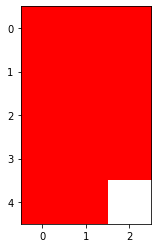

average change: nan %


 70%|███████   | 14/20 [00:14<00:06,  1.00s/it]

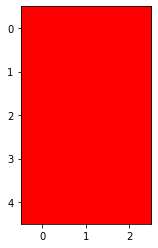

average change: nan %


 75%|███████▌  | 15/20 [00:15<00:05,  1.00s/it]

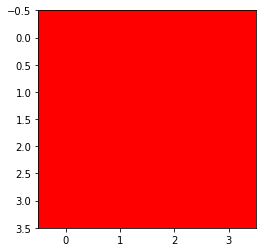

average change: nan %


 80%|████████  | 16/20 [00:16<00:04,  1.00s/it]

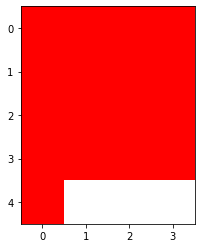

average change: nan %


 85%|████████▌ | 17/20 [00:17<00:03,  1.00s/it]

HTTP Error 404: Not Found


 90%|█████████ | 18/20 [00:18<00:02,  1.00s/it]

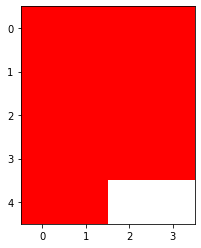

average change: nan %


 95%|█████████▌| 19/20 [00:19<00:01,  1.00s/it]

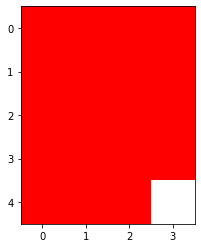

average change: nan %


100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


In [ ]:
change_df = update_stock_df()

In [ ]:
print(change_df.sort_values(by=["change"]))

        stock change
0     BTC-USD    NaN
1     ETH-USD    NaN
2     XRP-USD    NaN
3     BCH-USD    NaN
4     ADA-USD    NaN
5     LTC-USD    NaN
6     XEM-USD    NaN
7     XLM-USD    NaN
8     EOS-USD    NaN
9     NEO-USD    NaN
10  MIOTA-USD    NaN
11   DASH-USD    NaN
12    XMR-USD    NaN
13    TRX-USD    NaN
14    XTZ-USD    NaN
15   DOGE-USD    NaN
16    ETC-USD    NaN
17   USDT-USD    NaN
18    BNB-USD    NaN


In [ ]:
print(os.path.getsize("/content/drive/MyDrive/Investment_Analysis/s&p_500_stock_df.txt")/1024/1024/1024)

0.14543388038873672
